Importar las librerias necesarias para realizar el análisis exploratorio de datos.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import ast

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Leer los datos

In [6]:
df= pd.read_csv('/content/drive/MyDrive/CSVs/reviews_hotel_para_Eda.csv',engine= 'python' ) #reviews

## ANALISIS EXPLORATORIO DE DATOS

### Visión General

Comprender las dimensiones del dataset visaulizando las primeras 5 filas.

In [7]:
df.head(5)

,Unnamed: 0,user_id,name,time,rating,text,pics,resp,gmap_id,url_origen,etl_timestamp,response,state_from_json_url
0,0,1.149921e+20,Cherena Dukes,2019-11-21,4,Nice homes in fairly new subdivisions.,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00,0,Alabama
1,1,1.096825e+20,Lee Morrison,2018-11-25,2,Roads are terrible. Neighbors park in yards. ...,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00,0,Alabama
2,2,1.016355e+20,Yolanda Lee,2017-11-18,4,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00,0,Alabama
3,3,1.179038e+20,Alex Montgomery,2016-08-01,5,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00,0,Alabama
4,4,1.091065e+20,Kellye Talley,2018-04-13,5,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00,0,Alabama


Eliminamos las 2 columnas que se generaron en el proceso de extracción y filtrado.

In [8]:
df.drop(['Unnamed: 0', 'url_origen'], axis=1,inplace=True)


¿Qué tipo de datos contiene cada columna? 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133023 entries, 0 to 133022
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              133023 non-null  float64
 1   name                 133023 non-null  object 
 2   time                 133023 non-null  object 
 3   rating               133023 non-null  int64  
 4   text                 79718 non-null   object 
 5   pics                 5689 non-null    object 
 6   resp                 10751 non-null   object 
 7   gmap_id              133023 non-null  object 
 8   etl_timestamp        133023 non-null  object 
 9   response             133023 non-null  int64  
 10  state_from_json_url  133023 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 11.2+ MB


¿Cuantas dimensiones de cada tipo de dato tenemos en el dataframe?

In [10]:
df.dtypes.value_counts()

object     8
int64      2
float64    1
dtype: int64

Obtengo mas informacón de variables numericas y no numericas

In [11]:
df.describe()

,user_id,rating,response
count,1.330230e+05,133023.000000,133023.000000
mean,1.093279e+20,4.044083,0.080821
std,5.270775e+18,1.300562,0.272560
min,1.000003e+20,1.000000,0.000000
25%,1.048033e+20,3.000000,0.000000
50%,1.093030e+20,5.000000,0.000000
75%,1.138995e+20,5.000000,0.000000
max,1.184467e+20,5.000000,1.000000


In [12]:
df.describe(exclude=[np.number])

,name,time,text,pics,resp,gmap_id,etl_timestamp,state_from_json_url
count,133023,133023,79718,5689,10751,133023,133023,133023
unique,118087,3060,69409,5349,10337,3836,1,51
top,A Google User,2019-08-18,Nice,[{'url': ['https://lh5.googleusercontent.com/p...,"{'time': 1573036124921, 'text': 'Thanks for yo...",0x87b268eade43eb57:0x439f363b17204375,2023-02-22 02:36:00,Colorado
freq,70,202,215,3,4,5549,133023,10383


###Valores Faltantes 

Analicemos los valores nulos ¿Cuántos valores nulos tenemos en el total en el conjunto de datos?

In [13]:
df.isnull().sum().sum()

302911

¿Cuántos tenemos por cada dimensión?

In [14]:
df.isnull().sum()

user_id                     0
name                        0
time                        0
rating                      0
text                    53305
pics                   127334
resp                   122272
gmap_id                     0
etl_timestamp               0
response                    0
state_from_json_url         0
dtype: int64

Porcentaje de Nulos

In [15]:
list = df.isna().sum()
list = list[list > 0].div(df.shape[0]).mul(100)
list

text    40.072018
pics    95.723296
resp    91.917939
dtype: float64

### Valores duplicados

Analizamos las coincidencias teniendo en cuenta determinadas columnas.

In [16]:
df.duplicated(subset=['name','time','text','rating','gmap_id','pics', 'resp']).sum()

4338

Borramos los duplicados

In [17]:
df.drop_duplicates(subset=['name','time','text','rating','gmap_id','pics', 'resp'], inplace=True)

### Variables Numéricas

### Time

In [18]:
df.time.min(),df.time.max()

('2007-09-19', '2021-09-06')

In [19]:
df.time.value_counts()

2019-08-18    191
2019-07-21    175
2018-08-12    170
2019-07-10    170
2018-07-29    163
             ... 
2013-09-11      1
2014-05-18      1
2015-01-13      1
2013-09-28      1
2011-02-04      1
Name: time, Length: 3060, dtype: int64

Analizamos la cantidad de reviews por año

In [20]:
from datetime import datetime
df.time[0]
fecha_dt = datetime.strptime(df.time[0], '%Y-%m-%d')
df.time = df.time.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [21]:
reviews_year= df.groupby(df.time.dt.year)['user_id'].count().round(2)
reviews_year

time
2007        2
2008        4
2009        4
2010       18
2011      124
2012      137
2013      260
2014      373
2015     1265
2016     8569
2017    21265
2018    36217
2019    35062
2020    16459
2021     8926
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Cantidad de reseñas por año')

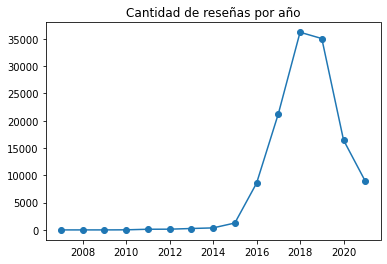

In [22]:
x = np.arange(2007,2022,1)
y = [reviews_year[i] for i in x]
plt.plot(x,y,marker ="o")
plt.title("Cantidad de reseñas por año")

Respuestas por año

In [23]:
response_year = df.groupby(df.time.dt.year)['response'].sum().round(2)
response_year 

time
2007       1
2008       0
2009       0
2010       0
2011       3
2012       3
2013       8
2014      20
2015      46
2016     497
2017    1583
2018    2846
2019    2863
2020    1554
2021     913
Name: response, dtype: int64

Text(0.5, 1.0, 'Cantidad de respuestas por año')

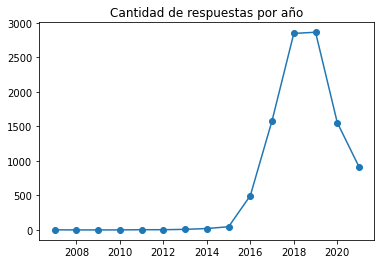

In [24]:
import numpy as np
x = np.arange(2007,2022,1)
y = [response_year[i] for i in x]
plt.plot(x,y,marker ="o")
plt.title("Cantidad de respuestas por año")

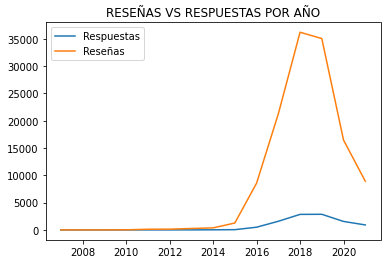

In [25]:
fig, ax = plt.subplots()
x1 = np.arange(2007,2022,1)
y1 = [response_year[i] for i in x]
x2 = np.arange(2007,2022,1)
y2 = [reviews_year[i] for i in x]
plt.title("RESEÑAS VS RESPUESTAS POR AÑO")

ax.plot(x1, y1, label = 'Respuestas')
ax.plot(x2, y2, label = 'Reseñas')
ax.legend(loc = 'upper left')
plt.show()

### Rating

Valores unicos de rating


In [26]:
df.rating.unique()

array([4, 2, 5, 3, 1])

Chequeo las cantidades por rating

In [27]:

a= df.rating.value_counts()
a

5    69553
4    25570
3    14962
1    11787
2     6813
Name: rating, dtype: int64

Porcentualmente

In [28]:
porc_rat=a[a > 0].div(df.shape[0]).mul(100)
porc_rat

5    54.049034
4    19.870226
3    11.626841
1     9.159576
2     5.294323
Name: rating, dtype: float64

Graficamente

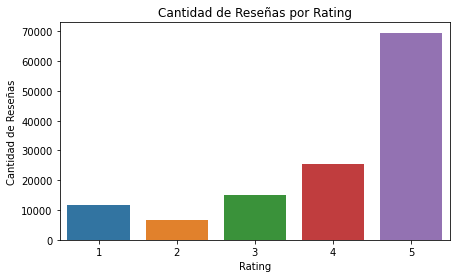

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(x=df.rating)
plt.title('Cantidad de Reseñas por Rating')

plt.xlabel('Rating')
plt.ylabel('Cantidad de Reseñas')
plt.show() #dibujamos el histograma

Text(0.5, 1.0, 'Rating de Reviews con y sin respuesta')

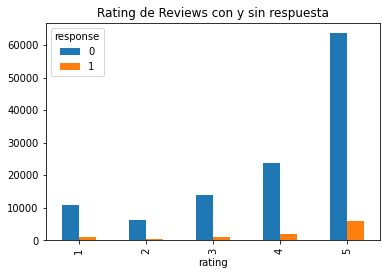

In [30]:
plot = pd.crosstab(index=df['rating'],
            columns=df['response']).plot(kind='bar')
plt.title('Rating de Reviews con y sin respuesta')

Observar la distribución de los datos en la columna rating

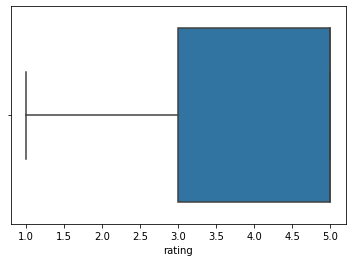

In [31]:
sns.boxplot(x=df["rating"])

### Variables Categóricas

##### Name

Cantidad de usuarios

In [32]:
len(df.name.unique())

118087

In [33]:
df.name.value_counts()

A Google User    69
John             20
Mike             17
David            16
D A              15
                 ..
Crystal Pope      1
josh flax         1
Travis Jorns      1
Diane Price       1
toosly 4u         1
Name: name, Length: 118087, dtype: int64

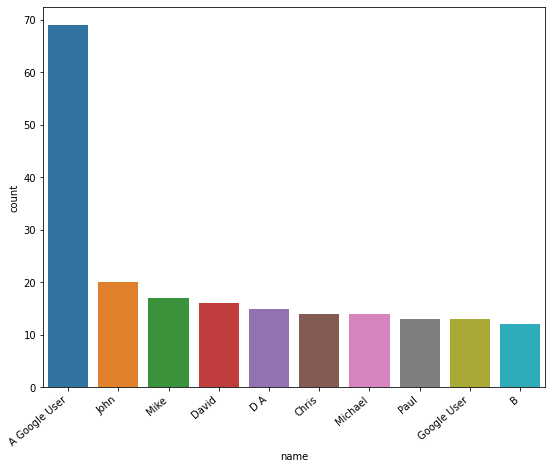

In [34]:
plt.figure(figsize=(9,7)),
ax = sns.countplot(x= "name", data=df,order=df["name"].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Top 5 USUARIOS con mejores respuestas promedio

In [35]:
dftop = df.groupby('name').mean()

In [36]:
top =dftop.sort_values(by = 'rating' , ascending = False)[['rating']].head(5)

In [37]:
top

,rating
name,
황보승우,5.0
binyomin wulliger,5.0
Kristin Strickland,5.0
Kristin Smith,5.0
Kristin Singleton-Ferrari,5.0


5 USUSARIOS con peor respuesta promedio

In [38]:
top2 =dftop.sort_values(by = 'rating' , ascending = True)[['rating']].head(5)

In [39]:
top2

,rating
name,
Kim Mickelson,1.0
Bear Davis,1.0
Keria,1.0
Keri Anne,1.0
Kenyatta Thompson,1.0


##### Text

Cantidad de reseñas unicas.

In [40]:
len(df.text.unique())

69410

10 Reseñas que mas se repiten

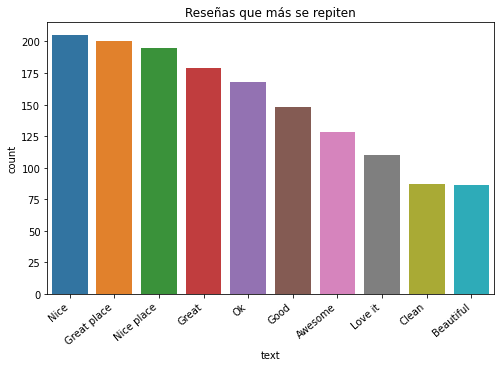

In [41]:
plt.figure(figsize=(8,5)),
ax = sns.countplot(x= "text", data=df,order=df["text"].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Reseñas que más se repiten')
plt.show()

Reviso los Nan de texto, quiero ver que rating tiene

In [42]:

text_null= df[df.text.isnull()]
text_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53021 entries, 2 to 133022
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53021 non-null  float64       
 1   name                 53021 non-null  object        
 2   time                 53021 non-null  datetime64[ns]
 3   rating               53021 non-null  int64         
 4   text                 0 non-null      object        
 5   pics                 558 non-null    object        
 6   resp                 3165 non-null   object        
 7   gmap_id              53021 non-null  object        
 8   etl_timestamp        53021 non-null  object        
 9   response             53021 non-null  int64         
 10  state_from_json_url  53021 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 4.9+ MB


Distribucion de rating por texto nulo

In [43]:
rat1= text_null[text_null.rating==1].shape[0]
rat2= text_null[text_null.rating==2].shape[0]
rat3= text_null[text_null.rating==3].shape[0]
rat4= text_null[text_null.rating==4].shape[0]
rat5= text_null[text_null.rating==5].shape[0]
print ('Rating_1:', rat1,'|''Rating_2:', rat2,'|' 'Rating_3:', rat3,'|''Rating_4:', rat4, '|''Rating_5:', rat5)

Rating_1: 3519 |Rating_2: 2570 |Rating_3: 6674 |Rating_4: 11081 |Rating_5: 29177


Graficamos la distribucion de nulos.

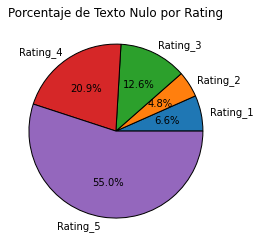

In [44]:
valores = [rat1,rat2,rat3,rat4,rat5]
nombres = ["Rating_1","Rating_2","Rating_3","Rating_4",'Rating_5']

plt.pie(valores, labels=nombres,autopct='%.1f%%',
        wedgeprops = {"edgecolor" : "black",},
          textprops={'fontsize':10 })
plt.title('Porcentaje de Texto Nulo por Rating')
plt.show()

Word Cloud

In [ ]:
#Ignoramos las filas que tienen nulos
df1 = df[df.text.isnull() == False]

In [ ]:
#Ignoramos las filas duplicadas
df1 = df1[df1['text'].duplicated() == False]

In [ ]:
#Nueva columna de la cantidad de caracteres que hay en un texto
df1["long_text"] = df1["text"].apply(len)

Text(0.5, 1.0, 'Histograma cantidad de caracteres por review')

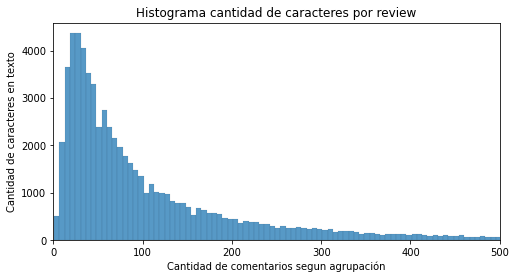

In [ ]:
#Cantidad de caracteres por reviews
plt.figure(figsize=(8,4))
sns.histplot(data=df1,x="long_text")
plt.xlim(0, 500)
plt.ylabel('Cantidad de caracteres en texto')
plt.xlabel('Cantidad de comentarios segun agrupación')
plt.title('Histograma cantidad de caracteres por review')

###### Word Cloud

In [ ]:
def message_cleaning(message):
    '''La función seleciona hace 3 cosas: Poner la cadena en miníscula, eliminar signos de puntuación y quitar stopwords'''
    message = message.lower()
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = "".join(test_punc_removed)
    stop_words = set(stopwords.words('english') + ['cant','im','u','werent','couldnt','dont','didnt','wasnt','us','want','ive','youre']+['google','translated'])
    test_punc_removed_join_clean = [palabra for palabra in test_punc_removed_join.split() if palabra not in stop_words]
    join = " ".join(test_punc_removed_join_clean)
    return join

In [ ]:
#Creamos una columna aplicando la función
df1['keywords'] = df1["text"].apply(lambda x: message_cleaning(x))

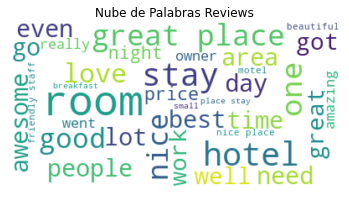

In [ ]:
#Se crea el wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=35, background_color="white").generate(' '.join(df1.keywords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras Reviews")
plt.show()

In [ ]:
#Se filtran por rating: malo , neutro y bueno
df_bad = df1[df1.rating.isin([1,2])] 
df_neu = df1[df1.rating == 3] 
df_great = df1[df1.rating.isin([4,5])] 

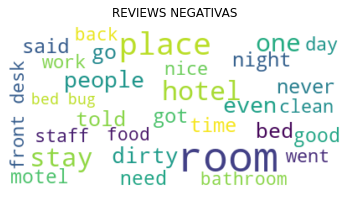

In [ ]:
#Se crea un wordcloud usando el filtrado de malo, neutro y bueno
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(' '.join(df_bad.keywords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("REVIEWS NEGATIVAS")
plt.axis("off")
plt.show()


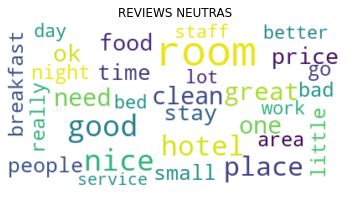

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(' '.join(df_neu.keywords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("REVIEWS NEUTRAS")
plt.axis("off")
plt.show()

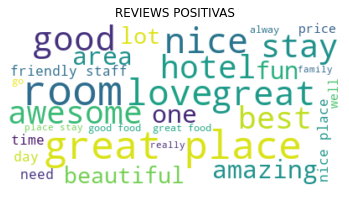

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(' '.join(df_great.keywords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("REVIEWS POSITIVAS")
plt.axis("off")
plt.show()

##### Resp

Text(0.5, 1.0, 'Cantidad de Reviews con y sin respuesta por rating')

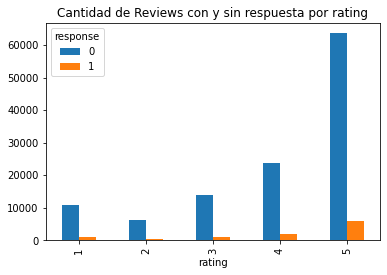

In [ ]:
plot = pd.crosstab(index=df['rating'],
            columns=df['response']).plot(kind='bar')
plt.title('Cantidad de Reviews con y sin respuesta por rating')

Text(0.5, 1.0, 'Proporción de Reviews por rating con y sin respuesta')

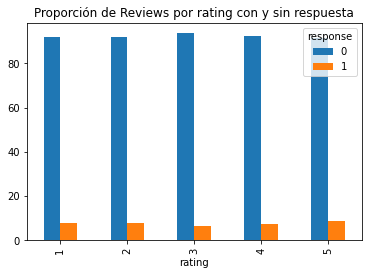

In [ ]:
plot = pd.crosstab(index=df['rating'],
            columns=df['response']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.title('Proporción de Reviews por rating con y sin respuesta')

In [ ]:
#Quitamos nulos
df2 = df[df.resp.isnull() == False]
#Quitamos duplicados
df2 = df2[df2['resp'].duplicated() == False]

In [ ]:
#Se vuelve diccionario
df2['resp'] = df2['resp'].apply(lambda x: ast.literal_eval(x))

In [ ]:
#Se extrae texto
df2['resp'] = df2['resp'].apply(lambda x: x['text'])

In [ ]:
#Nueva columna de la cantidad de caracteres que hay en un texto
df2["long_text"] = df2["resp"].apply(len)

Text(0.5, 1.0, 'Histograma cantidad de caracteres por Respuesta')

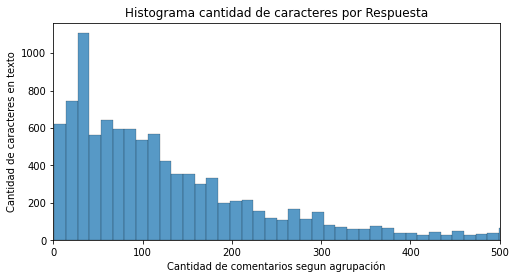

In [ ]:
#Cantidad de caracteres por reviews
plt.figure(figsize=(8,4))
sns.histplot(data=df2,x="long_text")
plt.xlim(0, 500)
plt.ylabel('Cantidad de caracteres en texto')
plt.xlabel('Cantidad de comentarios segun agrupación')
plt.title('Histograma cantidad de caracteres por Respuesta')

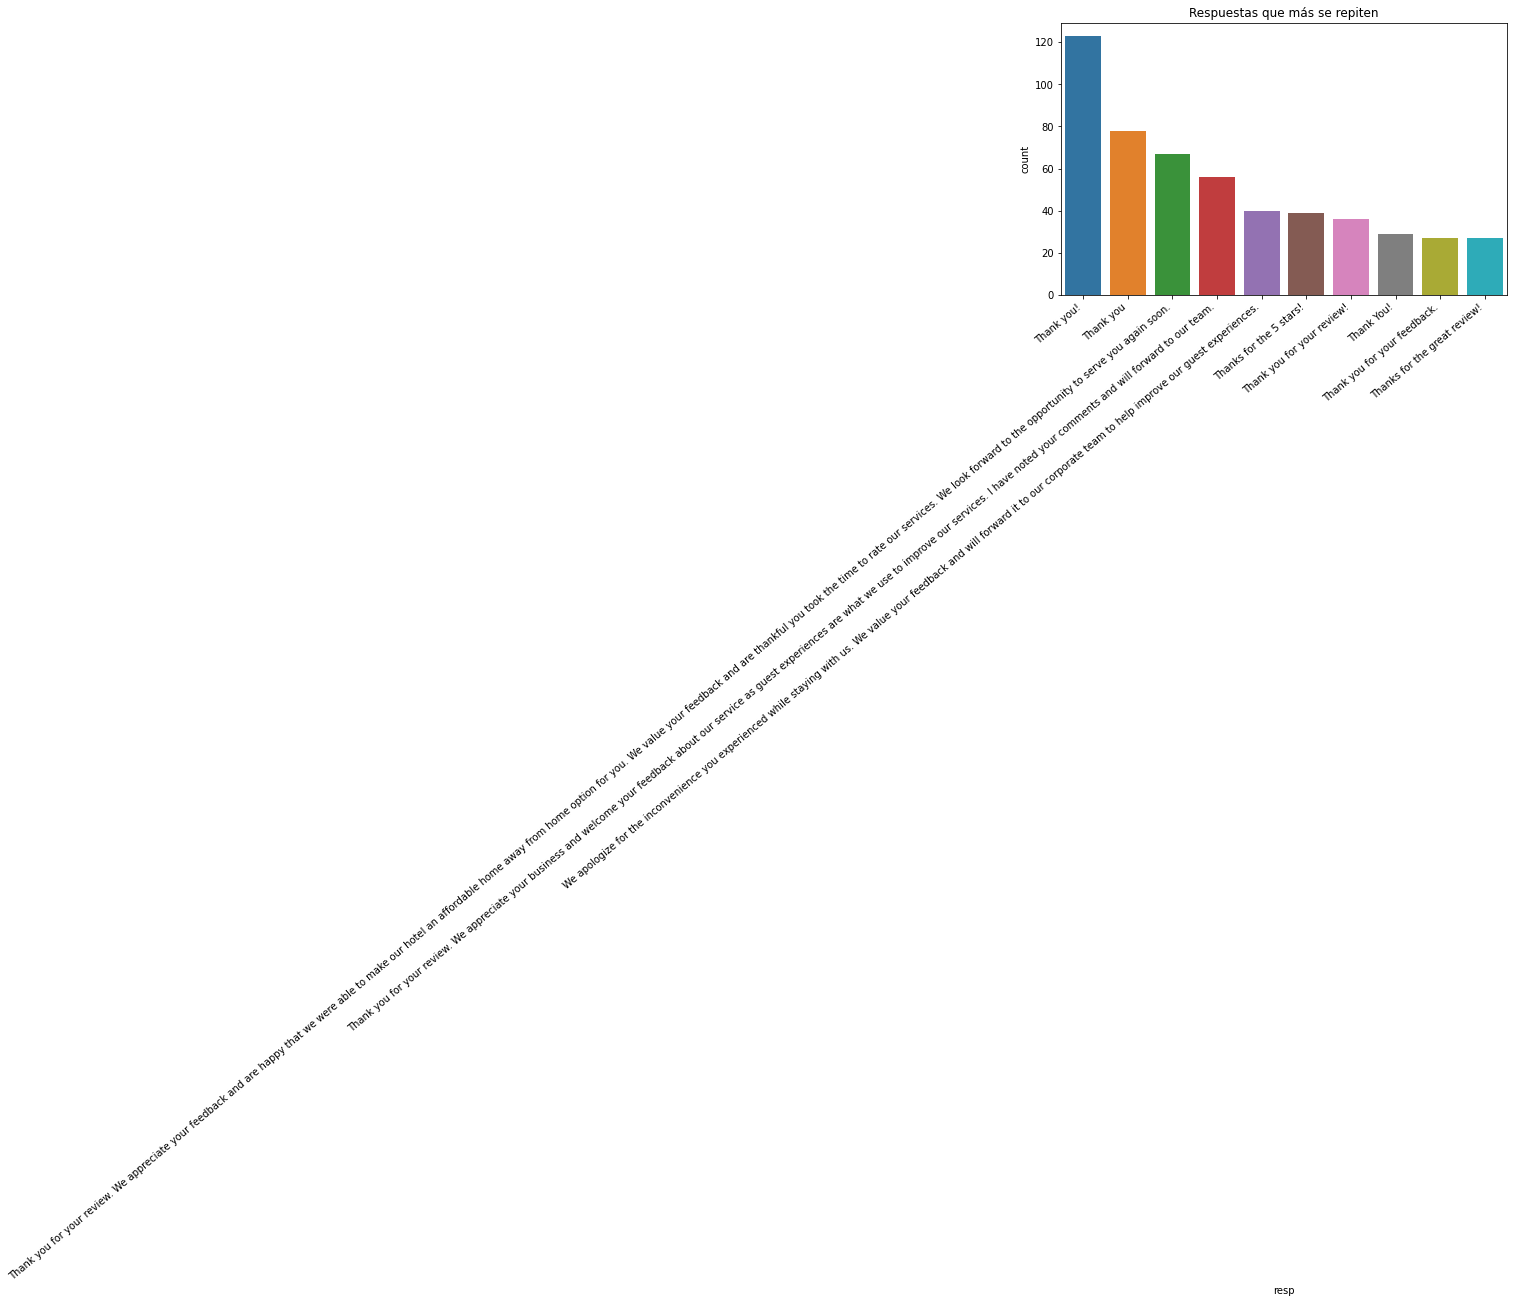

In [ ]:
plt.figure(figsize=(8,5)),
ax = sns.countplot(x= "resp", data=df2,order=df2["resp"].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Respuestas que más se repiten')
plt.show()

###### Word Cloud

In [ ]:
#Funcion preprocesamiento de wordcloud
def message_cleaning(message):
    '''La función seleciona hace 3 cosas: Poner la cadena en miníscula, eliminar signos de puntuación y quitar stopwords'''
    message = message.lower()
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = "".join(test_punc_removed)
    stop_words = set(stopwords.words('english') + ['cant','im','u','werent','couldnt','dont','didnt','wasnt','us','want','ive','youre']+['google','translated'])
    test_punc_removed_join_clean = [palabra for palabra in test_punc_removed_join.split() if palabra not in stop_words]
    join = " ".join(test_punc_removed_join_clean)
    return join

In [ ]:
#Funcion preprocesamiento de wordcloud
df2['resp_keywords'] = df2["resp"].apply(lambda x: message_cleaning(x))

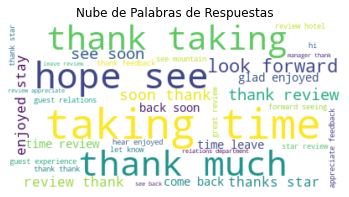

In [ ]:
#Se crea el wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=35, background_color="white").generate(' '.join(df2.resp_keywords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Respuestas")
plt.show()